In [255]:
import pypsa ;
import json ;

# n1=pypsa.Network("./five_country/results/NG/networks/elec_s_10_ec_lcopt_Co2L-4H.nc")
n1=pypsa.Network("./results/NG/networks/elec_s_10_ec_lcopt_Co2L-4H.nc")



INFO:pypsa.io:Imported network elec_s_10_ec_lcopt_Co2L-4H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [256]:
import numpy as np
import math

(<matplotlib.collections.PatchCollection at 0x2494f52c8e0>,
 <matplotlib.collections.LineCollection at 0x2494f57de40>)

e:\installs\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



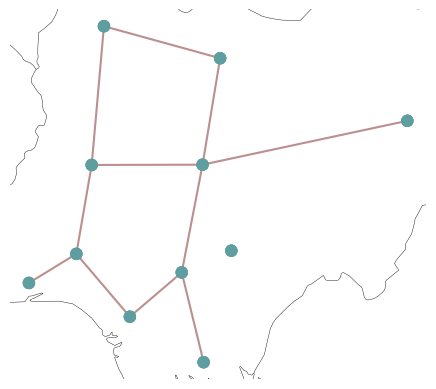

In [257]:
n1.meta
n1.plot()

In [258]:
n1.statistics()


Capacity Factor  Capital Expenditure  \
            carrier                                                    
Generator   Combined-Cycle Gas     1.720854e-01         1.417680e+08   
            Oil                    3.006144e-04         8.208971e+07   
            Onshore Wind           9.315786e-02         5.877487e+04   
            Open-Cycle Gas         7.875905e-02         2.715613e+08   
            Solar                  7.239106e-01         2.370894e+08   
            load                   1.083563e-20         0.000000e+00   
Line        AC                     2.996697e-01         2.717128e+08   
Link        H2 electrolysis                 NaN         0.000000e+00   
            H2 fuel cell                    NaN         0.000000e+00   
            battery charger                 NaN         0.000000e+00   
            battery discharger              NaN         0.000000e+00   
Load        -                               NaN                  NaN   
StorageUnit Reservoir & Dam                 NaN         0.000000e+00   
Store       Battery Storage                 NaN         0.000000e+00   
            Hydrogen Storage                NaN         0.000000e+00   

                                Curtailment  Installed Capacity  \
            carrier                                               
Generator   Combined-Cycle Gas     0.000000        1.431599e+03   
            Oil                    0.000000        2.167625e+03   
            Onshore Wind           0.473923        6.116906e-01   
            Open-Cycle Gas         0.000000        6.021930e+03   
            Solar                955.084982        2.580307e+01   
            load                   0.000000        1.100000e+10   
Line        AC                          NaN        2.810807e+04   
Link        H2 electrolysis             NaN        0.000000e+00   
            H2 fuel cell                NaN        0.000000e+00   
            battery charger             NaN        0.000000e+00   
            battery discharger          NaN        0.000000e+00   
Load        -                           NaN                 NaN   
StorageUnit Reservoir & Dam        0.000000        1.905414e+03   
Store       Battery Storage             NaN        0.000000e+00   
            Hydrogen Storage            NaN        0.000000e+00   

                                Operational Expenditure  Optimal Capacity  \
            carrier                                                         
Generator   Combined-Cycle Gas             9.574760e+03      1.431599e+03   
            Oil                            9.700504e+01      2.167625e+03   
            Onshore Wind                   1.445008e-03      6.116910e-01   
            Open-Cycle Gas                 2.539029e+04      6.021924e+03   
            Solar                          9.459831e+01      6.659427e+03   
            load                          -2.936666e-11      1.100000e+10   
Line        AC                                      NaN      2.219056e+04   
Link        H2 electrolysis                0.000000e+00      0.000000e+00   
            H2 fuel cell                   0.000000e+00      0.000000e+00   
            battery charger                0.000000e+00      0.000000e+00   
            battery discharger             0.000000e+00      0.000000e+00   
Load        -                                       NaN               NaN   
StorageUnit Reservoir & Dam                0.000000e+00      1.905414e+03   
Store       Battery Storage                0.000000e+00      0.000000e+00   
            Hydrogen Storage               0.000000e+00      0.000000e+00   

                                     Revenue        Supply    Withdrawal  
            carrier                                                       
Generator   Combined-Cycle Gas  1.420984e+04  2.463573e+02  0.000000e+00  
            Oil                 9.700509e+01  6.516194e-01  0.000000e+00  
            Onshore Wind        2.532280e+00  5.698383e-0

In [259]:
n1.statistics()[[x != 0 and not math.isnan(x) for x in n1.statistics()['Capital Expenditure']]]['Capital Expenditure'].loc["Generator"].drop("Solar")

carrier
Combined-Cycle Gas    1.417680e+08
Oil                   8.208971e+07
Onshore Wind          5.877487e+04
Open-Cycle Gas        2.715613e+08
Name: Capital Expenditure, dtype: float64

In [260]:
n1.statistics()['Capital Expenditure'].loc["Generator"].drop('load')

carrier
Combined-Cycle Gas    1.417680e+08
Oil                   8.208971e+07
Onshore Wind          5.877487e+04
Open-Cycle Gas        2.715613e+08
Solar                 2.370894e+08
Name: Capital Expenditure, dtype: float64

In [261]:
n1.statistics().describe()

,Capacity Factor,Capital Expenditure,Curtailment,Installed Capacity,Operational Expenditure,Optimal Capacity,Revenue,Supply,Withdrawal
count,7.000000e+00,1.400000e+01,7.000000,1.400000e+01,1.300000e+01,1.400000e+01,1.500000e+01,11.000000,1.100000e+01
mean,1.954119e-01,7.173429e+07,136.508415,7.857171e+08,2.704358e+03,7.857172e+08,9.404190e+03,1108.365151,-1.108365e+03
std,2.552916e-01,1.104468e+08,360.958381,2.939873e+09,7.310295e+03,2.939873e+09,1.955249e+04,2328.802278,2.478365e+03
min,1.083563e-20,0.000000e+00,0.000000,0.000000e+00,-2.936666e-11,0.000000e+00,0.000000e+00,0.000000,-6.649840e+03
25%,3.952983e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-3.706345e-14
50%,9.315786e-02,0.000000e+00,0.000000,1.320738e+01,0.000000e+00,7.161053e+02,2.046997e-09,0.056984,0.000000e+00
75%,2.358776e-01,1.268484e+08,0.236961,2.102072e+03,9.459831e+01,5.058349e+03,7.830140e+03,360.319151,0.000000e+00
max,7.239106e-01,2.717128e+08,955.084982,1.100000e+10,2.539029e+04,1.100000e+10,7.053143e+04,6649.840146,0.000000e+00


In [262]:
n1.generators.columns

Index(['p_nom_max', 'weight', 'p_nom', 'capital_cost', 'efficiency',
       'p_nom_min', 'marginal_cost', 'p_nom_extendable', 'bus', 'carrier',
       'control', 'p_nom_opt', 'sign', 'build_year', 'min_up_time',
       'min_down_time', 'up_time_before', 'down_time_before', 'type',
       'p_min_pu', 'p_max_pu', 'p_set', 'q_set', 'lifetime', 'committable',
       'start_up_cost', 'shut_down_cost', 'ramp_limit_up', 'ramp_limit_down',
       'ramp_limit_start_up', 'ramp_limit_shut_down'],
      dtype='object')

In [263]:
n1.buses

,v_nom,country,x,y,control,generator,carrier,type,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network
Bus,,,,,,,,,,,,,
NG0 0,300.0,NG,6.914892,7.066258,Slack,NG0 0 OCGT,AC,,None,1.0,0.0,inf,
NG0 1,300.0,NG,7.389775,9.523867,PQ,,AC,,None,1.0,0.0,inf,
NG0 2,300.0,NG,5.732033,6.056000,PQ,,AC,,None,1.0,0.0,inf,
NG0 3,300.0,NG,7.414267,5.019233,PQ,,AC,,None,1.0,0.0,inf,
NG0 4,300.0,NG,12.060480,10.524290,PQ,,AC,,None,1.0,0.0,inf,
NG0 5,300.0,NG,4.511129,7.489700,PQ,,AC,,None,1.0,0.0,inf,
NG0 6,300.0,NG,7.790400,11.951400,PQ,,AC,,None,1.0,0.0,inf,
NG0 7,300.0,NG,4.861125,9.517175,PQ,,AC,,None,1.0,0.0,inf,
NG0 8,300.0,NG,3.429873,6.826991,PQ,,AC,,None,1.0,0.0,inf,


In [264]:
n1.lines

,bus0,bus1,num_parallel,length,type,s_max_pu,s_nom,capital_cost,s_nom_extendable,s_nom_min,...,s_nom_max,lifetime,terrain_factor,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu
Line,,,,,,,,,,,,,,,,,,,,,
1,NG0 0,NG0 1,2.368421,347.779326,Al/St 240/40 4-bundle 380.0,0.7,4021.821975,14342.718313,True,3175.122612,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
2,NG0 0,NG0 2,3.250000,215.394003,Al/St 240/40 4-bundle 380.0,0.7,5518.833488,8882.703608,True,4356.973806,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
3,NG0 0,NG0 3,1.184211,292.775421,Al/St 240/40 4-bundle 380.0,0.7,2010.910988,12071.748289,True,1587.561306,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
4,NG0 1,NG0 4,0.881579,654.222234,Al/St 240/40 4-bundle 380.0,0.7,1497.011513,26972.442686,True,1181.851194,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
5,NG0 1,NG0 6,0.881579,341.817636,Al/St 240/40 4-bundle 380.0,0.7,1497.011513,14092.140045,True,1181.851194,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
6,NG0 1,NG0 7,1.184211,346.625845,Al/St 240/40 4-bundle 380.0,0.7,2010.910988,14292.832629,True,1587.561306,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
7,NG0 2,NG0 5,1.776316,260.971155,Al/St 240/40 4-bundle 380.0,0.7,3016.366481,10763.670795,True,2381.341959,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
8,NG0 5,NG0 7,1.776316,285.883317,Al/St 240/40 4-bundle 380.0,0.7,3016.366481,11788.342266,True,2381.341959,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
9,NG0 5,NG0 8,2.368421,175.271467,Al/St 240/40 4-bundle 380.0,0.7,4021.821975,7226.511337,True,3175.122612,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0


In [265]:
n

NameError: name 'n' is not defined

In [ ]:
n1.storage_units

,p_nom,efficiency_dispatch,efficiency_store,cyclic_state_of_charge,carrier,bus,max_hours,p_min_pu,marginal_cost,build_year,...,q_set,sign,capital_cost,lifetime,state_of_charge_initial,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge_per_period,standing_loss,inflow
StorageUnit,,,,,,,,,,,,,,,,,,,,,
NG0 1 hydro,592.356688,0.9,0.0,True,hydro,NG0 1,6.0,0.0,0.010943,0,...,0.0,1.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
NG0 7 hydro,1313.057325,0.9,0.0,True,hydro,NG0 7,6.0,0.0,0.010297,0,...,0.0,1.0,0.0,inf,0.0,False,NaN,True,0.0,0.0


In [ ]:
n1.carriers[n1.carriers["co2_emissions"]!=0]["co2_emissions"]

Carrier
geothermal    0.03
oil           0.26
coal          0.34
OCGT          0.20
CCGT          0.20
lignite       0.41
Name: co2_emissions, dtype: float64

In [ ]:
n1.links.columns

Index(['bus0', 'bus1', 'carrier', 'p_nom_extendable', 'efficiency',
       'capital_cost', 'build_year', 'charger_ratio', 'type', 'lifetime',
       'p_nom', 'p_nom_min', 'p_nom_max', 'p_set', 'p_min_pu', 'p_max_pu',
       'marginal_cost', 'length', 'terrain_factor', 'committable',
       'start_up_cost', 'shut_down_cost', 'min_up_time', 'min_down_time',
       'up_time_before', 'down_time_before', 'ramp_limit_up',
       'ramp_limit_down', 'ramp_limit_start_up', 'ramp_limit_shut_down',
       'p_nom_opt'],
      dtype='object')

In [ ]:
dir(n1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_dataframes',
 '_cCounter',
 '_investment_period_weightings',
 '_investment_periods',
 '_meta',
 '_multi_invest',
 '_retrieve_overridden_components',
 '_snapshot_weightings',
 '_snapshots',
 '_xCounter',
 'add',
 'adjacency_matrix',
 'all_components',
 'branch_components',
 'branches',
 'buses',
 'buses_t',
 'calculate_dependent_values',
 'carriers',
 'carriers_t',
 'component_attrs',
 'components',
 'consistency_check',
 'controllable_branch_components',
 'controllable_branches',
 'controllable_one_port_components',
 'copy',
 'determine_network_topology',
 'df',
 'export_to_csv_folder',
 'export_to

In [ ]:
n1.buses

,v_nom,country,x,y,control,generator,carrier,type,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network
Bus,,,,,,,,,,,,,
NG0 0,300.0,NG,6.914892,7.066258,Slack,NG0 0 OCGT,AC,,,1.0,0.0,inf,
NG0 1,300.0,NG,7.389775,9.523867,PQ,,AC,,,1.0,0.0,inf,
NG0 2,300.0,NG,5.732033,6.056000,PQ,,AC,,,1.0,0.0,inf,
NG0 3,300.0,NG,7.414267,5.019233,PQ,,AC,,,1.0,0.0,inf,
NG0 4,300.0,NG,12.060480,10.524290,PQ,,AC,,,1.0,0.0,inf,
NG0 5,300.0,NG,4.511129,7.489700,PQ,,AC,,,1.0,0.0,inf,
NG0 6,300.0,NG,7.790400,11.951400,PQ,,AC,,,1.0,0.0,inf,
NG0 7,300.0,NG,4.861125,9.517175,PQ,,AC,,,1.0,0.0,inf,
NG0 8,300.0,NG,3.429873,6.826991,PQ,,AC,,,1.0,0.0,inf,


In [ ]:
n1.generators

,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,p_nom_extendable,bus,carrier,...,p_set,q_set,lifetime,committable,start_up_cost,shut_down_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
NG0 0 OCGT,inf,0.000000,8.247251e+02,45095.441515,0.41,824.725075,53.534765,True,NG0 0,OCGT,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
NG0 0 onwind,2.188642e+05,17147.260117,0.000000e+00,96085.888020,1.00,0.000000,0.024407,True,NG0 0,onwind,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
NG0 0 solar,2.206916e+05,36033.981726,1.701461e+00,35602.071244,1.00,1.701461,0.019401,True,NG0 0,solar,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
NG0 1 onwind,3.072763e+05,14384.039211,1.037986e-01,96085.888020,1.00,0.103799,0.024417,True,NG0 1,onwind,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
NG0 1 solar,5.304338e+05,93700.507178,5.587536e+00,35602.071244,1.00,5.587536,0.019406,True,NG0 1,solar,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
NG0 2 CCGT,inf,0.000000,1.431599e+03,99027.729293,0.58,1431.598949,38.865344,False,NG0 2,CCGT,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
NG0 2 OCGT,inf,0.000000,6.064155e+02,45095.441515,0.41,606.415497,53.533434,True,NG0 2,OCGT,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
NG0 2 oil,inf,0.000000,9.448622e+02,37870.807407,0.35,944.862205,148.867658,False,NG0 2,oil,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
NG0 2 onwind,3.596264e+04,1560.000988,0.000000e+00,96085.888020,1.00,0.000000,0.025238,True,NG0 2,onwind,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0


In [317]:
n1.buses

,v_nom,country,x,y,control,generator,carrier,type,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network
Bus,,,,,,,,,,,,,
NG0 0,300.0,NG,6.914892,7.066258,Slack,NG0 0 OCGT,AC,,None,1.0,0.0,inf,
NG0 1,300.0,NG,7.389775,9.523867,PQ,,AC,,None,1.0,0.0,inf,
NG0 2,300.0,NG,5.732033,6.056000,PQ,,AC,,None,1.0,0.0,inf,
NG0 3,300.0,NG,7.414267,5.019233,PQ,,AC,,None,1.0,0.0,inf,
NG0 4,300.0,NG,12.060480,10.524290,PQ,,AC,,None,1.0,0.0,inf,
NG0 5,300.0,NG,4.511129,7.489700,PQ,,AC,,None,1.0,0.0,inf,
NG0 6,300.0,NG,7.790400,11.951400,PQ,,AC,,None,1.0,0.0,inf,
NG0 7,300.0,NG,4.861125,9.517175,PQ,,AC,,None,1.0,0.0,inf,
NG0 8,300.0,NG,3.429873,6.826991,PQ,,AC,,None,1.0,0.0,inf,


In [321]:
df = pd.DataFrame()
df["x"] = n1.buses["x"]
df["y"] = n1.buses["y"]
df["name"] = n1.buses.index
df["size"] = n1.stores["marginal_cost"]
df.index

Index(['NG0 0', 'NG0 1', 'NG0 2', 'NG0 3', 'NG0 4', 'NG0 5', 'NG0 6', 'NG0 7',
       'NG0 8', 'NG0 9', 'NG1 0', 'NG0 0 H2', 'NG0 1 H2', 'NG0 2 H2',
       'NG0 3 H2', 'NG0 4 H2', 'NG0 5 H2', 'NG0 6 H2', 'NG0 7 H2', 'NG0 8 H2',
       'NG0 9 H2', 'NG1 0 H2', 'NG0 0 battery', 'NG0 1 battery',
       'NG0 2 battery', 'NG0 3 battery', 'NG0 4 battery', 'NG0 5 battery',
       'NG0 6 battery', 'NG0 7 battery', 'NG0 8 battery', 'NG0 9 battery',
       'NG1 0 battery'],
      dtype='object', name='Bus')

In [330]:
dropped_indices = []
for i in range(len(df)):
    if "battery" not in df["name"][i]:
        dropped_indices.append(df["name"][i])

df.drop(index=dropped_indices, inplace=True)
df

,x,y,name,size
Bus,,,,
NG0 0 battery,6.914892,7.066258,NG0 0 battery,0.010148
NG0 1 battery,7.389775,9.523867,NG0 1 battery,0.010516
NG0 2 battery,5.732033,6.056000,NG0 2 battery,0.010545
NG0 3 battery,7.414267,5.019233,NG0 3 battery,0.010304
NG0 4 battery,12.060480,10.524290,NG0 4 battery,0.010633
NG0 5 battery,4.511129,7.489700,NG0 5 battery,0.009708
NG0 6 battery,7.790400,11.951400,NG0 6 battery,0.010364
NG0 7 battery,4.861125,9.517175,NG0 7 battery,0.010963
NG0 8 battery,3.429873,6.826991,NG0 8 battery,0.009767


In [323]:
import pandas as pd

In [324]:
n=pypsa.Network("./results/NG/networks/elec_s_10_ec_lcopt_Co2L-4H.nc")
bus_sizes = pd.concat(
    (
        n.generators.query('carrier != "load"')
        .groupby(["bus", "carrier"])
        .p_nom_opt.sum(),
        n.storage_units.groupby(["bus", "carrier"]).p_nom_opt.sum(),
    )
)

INFO:pypsa.io:Imported network elec_s_10_ec_lcopt_Co2L-4H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [325]:
bus_sizes

bus    carrier
NG0 0  OCGT        824.725000
       onwind        0.000000
       solar       388.213000
NG0 1  onwind        0.103799
       solar      2085.790000
NG0 2  CCGT       1431.598949
       OCGT        606.415000
       oil         944.862205
       onwind        0.000000
       solar         0.000000
NG0 3  OCGT       2278.770000
       onwind        0.000000
       solar         0.000000
NG0 4  onwind        0.507892
       solar      1332.730000
NG0 5  OCGT        706.137000
       onwind        0.000000
       solar         0.000000
NG0 6  onwind        0.000000
       solar      1999.180000
NG0 7  onwind        0.000000
       solar         0.769502
NG0 8  OCGT        449.197000
       oil        1222.762854
       onwind        0.000000
       solar         0.000000
NG0 9  onwind        0.000000
       solar       257.748000
NG1 0  OCGT       1156.680000
       onwind        0.000000
       solar       594.996000
NG0 1  hydro       592.356688
NG0 7  hydro      1313.05

In [326]:
from utils import plot
n

PyPSA Network
Components:
 - Bus: 33
 - Carrier: 18
 - Generator: 42
 - GlobalConstraint: 1
 - Line: 11
 - Link: 44
 - Load: 11
 - StorageUnit: 2
 - Store: 22
Snapshots: 222

ful u


(<matplotlib.collections.PatchCollection at 0x249501421d0>,
 <matplotlib.collections.LineCollection at 0x2495017d3c0>)

e:\installs\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



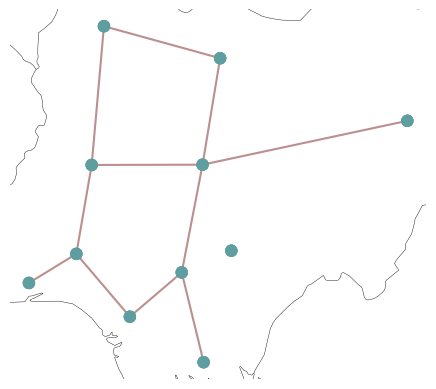

In [327]:
from utils import plot
plot.plot(n)

In [328]:
n.iplot(mapbox=True, mapbox_style="open-street-map")

NameError: name 'go' is not defined

In [ ]:
print ("hi")
plot.iplot(n1, mapbox=True, mapbox_style="open-street-map")

hi
fuck you 


{'data': [Scattermapbox({
      'lat': [7.066258333333333, 7.066258333333333],
      'line': {'color': 'darkseagreen', 'width': 3},
      'lon': [6.914891666666667, 6.914891666666667],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [9.523866666666665, 9.523866666666665],
      'line': {'color': 'darkseagreen', 'width': 3},
      'lon': [7.3897749999999975, 7.3897749999999975],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [6.056, 6.056],
      'line': {'color': 'darkseagreen', 'width': 3},
      'lon': [5.732033333333334, 5.732033333333334],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [5.019233333333333, 5.019233333333333],
      'line': {'color': 'darkseagreen', 'width': 3},
      'lon': [7.414266666666666, 7.414266666666666],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [10.524289999999999, 10.524289999999999],
      'line': {'color': 'darkseag

In [ ]:
import pandas as pd
df = pd.DataFrame()
df["x"] = n1.buses["x"]


In [ ]:
buses_map = {n1.buses.index[i]: {"x": n1.buses["x"][i], "y": n1.buses["y"][i]} for i in range(len(n1.buses))}
buses_map

{'NG0 0': {'x': 6.914891666666667, 'y': 7.066258333333333},
 'NG0 1': {'x': 7.3897749999999975, 'y': 9.523866666666665},
 'NG0 2': {'x': 5.732033333333334, 'y': 6.056},
 'NG0 3': {'x': 7.414266666666666, 'y': 5.019233333333333},
 'NG0 4': {'x': 12.06048, 'y': 10.524289999999999},
 'NG0 5': {'x': 4.511128571428571, 'y': 7.4897},
 'NG0 6': {'x': 7.7904, 'y': 11.9514},
 'NG0 7': {'x': 4.8611249999999995, 'y': 9.517175},
 'NG0 8': {'x': 3.4298727272727274, 'y': 6.8269909090909096},
 'NG0 9': {'x': 5.140899999999999, 'y': 12.682},
 'NG1 0': {'x': 8.04622, 'y': 7.56224},
 'NG0 0 H2': {'x': 6.914891666666667, 'y': 7.066258333333333},
 'NG0 1 H2': {'x': 7.3897749999999975, 'y': 9.523866666666665},
 'NG0 2 H2': {'x': 5.732033333333334, 'y': 6.056},
 'NG0 3 H2': {'x': 7.414266666666666, 'y': 5.019233333333333},
 'NG0 4 H2': {'x': 12.06048, 'y': 10.524289999999999},
 'NG0 5 H2': {'x': 4.511128571428571, 'y': 7.4897},
 'NG0 6 H2': {'x': 7.7904, 'y': 11.9514},
 'NG0 7 H2': {'x': 4.8611249999999995,

In [ ]:
n1.iplot()

{'data': [{'x': Bus
   NG0 0             6.914892
   NG0 1             7.389775
   NG0 2             5.732033
   NG0 3             7.414267
   NG0 4            12.060480
   NG0 5             4.511129
   NG0 6             7.790400
   NG0 7             4.861125
   NG0 8             3.429873
   NG0 9             5.140900
   NG1 0             8.046220
   NG0 0 H2          6.914892
   NG0 1 H2          7.389775
   NG0 2 H2          5.732033
   NG0 3 H2          7.414267
   NG0 4 H2         12.060480
   NG0 5 H2          4.511129
   NG0 6 H2          7.790400
   NG0 7 H2          4.861125
   NG0 8 H2          3.429873
   NG0 9 H2          5.140900
   NG1 0 H2          8.046220
   NG0 0 battery     6.914892
   NG0 1 battery     7.389775
   NG0 2 battery     5.732033
   NG0 3 battery     7.414267
   NG0 4 battery    12.060480
   NG0 5 battery     4.511129
   NG0 6 battery     7.790400
   NG0 7 battery     4.861125
   NG0 8 battery     3.429873
   NG0 9 battery     5.140900
   NG1 0 battery    

In [ ]:
line_df=pd.DataFrame()

source_x_list = []
source_y_list = []
destination_x_list = []
destination_y_list = []
line_name = []
width = []

for i in range(len(n1.lines)):
    source_x_list.append(buses_map[n1.lines.bus0[i]]["x"])
    source_y_list.append(buses_map[n1.lines.bus0[i]]["y"])
    destination_x_list.append(buses_map[n1.lines.bus1[i]]["x"])
    destination_y_list.append(buses_map[n1.lines.bus1[i]]["y"])
    line_name.append(f"line_{n1.lines.index[i]}")
    width.append(n1.lines.s_nom[i])

line_df["source_x"] = source_x_list
line_df["source_y"] = source_y_list
line_df["destination_x"] = destination_x_list
line_df["destination_y"] = destination_y_list
line_df["index"] = line_name
line_df["width"] = width

    

In [ ]:
line_df

,source_x,source_y,destination_x,destination_y,index,width
0,6.914892,7.066258,7.389775,9.523867,line_1,4021.821975
1,6.914892,7.066258,5.732033,6.056000,line_2,5518.833488
2,6.914892,7.066258,7.414267,5.019233,line_3,2010.910988
3,7.389775,9.523867,12.060480,10.524290,line_4,1497.011513
4,7.389775,9.523867,7.790400,11.951400,line_5,1497.011513
5,7.389775,9.523867,4.861125,9.517175,line_6,2010.910988
6,5.732033,6.056000,4.511129,7.489700,line_7,3016.366481
7,4.511129,7.489700,4.861125,9.517175,line_8,3016.366481
8,4.511129,7.489700,3.429873,6.826991,line_9,4021.821975
9,7.790400,11.951400,5.140900,12.682000,line_10,491.556019


In [ ]:
n1.lines

,bus0,bus1,num_parallel,length,type,s_max_pu,s_nom,capital_cost,s_nom_extendable,s_nom_min,...,s_nom_max,lifetime,terrain_factor,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu
Line,,,,,,,,,,,,,,,,,,,,,
1,NG0 0,NG0 1,2.368421,347.779326,Al/St 240/40 4-bundle 380.0,0.7,4021.821975,14342.718313,True,3175.122612,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
2,NG0 0,NG0 2,3.250000,215.394003,Al/St 240/40 4-bundle 380.0,0.7,5518.833488,8882.703608,True,4356.973806,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
3,NG0 0,NG0 3,1.184211,292.775421,Al/St 240/40 4-bundle 380.0,0.7,2010.910988,12071.748289,True,1587.561306,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
4,NG0 1,NG0 4,0.881579,654.222234,Al/St 240/40 4-bundle 380.0,0.7,1497.011513,26972.442686,True,1181.851194,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
5,NG0 1,NG0 6,0.881579,341.817636,Al/St 240/40 4-bundle 380.0,0.7,1497.011513,14092.140045,True,1181.851194,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
6,NG0 1,NG0 7,1.184211,346.625845,Al/St 240/40 4-bundle 380.0,0.7,2010.910988,14292.832629,True,1587.561306,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
7,NG0 2,NG0 5,1.776316,260.971155,Al/St 240/40 4-bundle 380.0,0.7,3016.366481,10763.670795,True,2381.341959,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
8,NG0 5,NG0 7,1.776316,285.883317,Al/St 240/40 4-bundle 380.0,0.7,3016.366481,11788.342266,True,2381.341959,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
9,NG0 5,NG0 8,2.368421,175.271467,Al/St 240/40 4-bundle 380.0,0.7,4021.821975,7226.511337,True,3175.122612,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
